#**BEVERAGE SALES FORECASTING AND TREND ANALYSIS**



#***`PROBLEM STATEMENT`***


* Analyze and predict beverage sales transactions by exploring the influence of customer type, product category, unit price, quantity, discount, and region on total sales price.

* The project aims to uncover sales patterns, understand customer behaviors, optimize pricing and discount strategies, and accurately forecast total revenue using historical transaction data. This analysis will empower businesses with data-driven strategies to maximize profitability and improve decision-making.


#***`Objectives`***

 * Sales Trend Analysis:Identify and visualize sales trends over time, segmented by factors like region, product, and customer type


 * Product & Customer Insights:Analyze product performance and customer buying patterns to identify key drivers of sales.

 * Predictive Modeling:Build a regression model to predict total sales price based on features like quantity, unit price, and discounts.

 * Optimization & Strategy Recommendations:Provide actionable insights for optimizing pricing, discounts, and inventory strategies based on the analysis. **bold text**

#***`Goal of the dataset`***

Analyze beverage sales data to uncover patterns, understand customer behavior, and support business decisions like inventory management, marketing strategies, and sales forecasting.


#***`Domain`***

 it focuses on sales transactions of beverages (like Alcohol, water, soft drinks, and juices) across different regions and customer types.

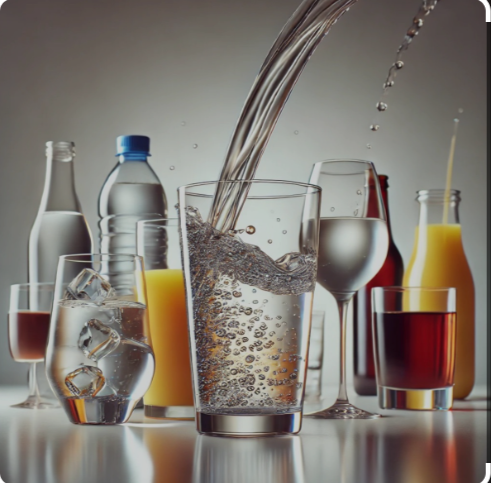


##***`Key Features`***

Order_ID: Unique identifier for each order.

Customer_ID: Unique identifier for each customer.

Customer_Type: Type of customer (B2B or B2C).

Product: Name of the beverage product sold.

Category: Beverage category (Water, Juices, Soft Drinks, Alcoholic Beverages, etc.).

Unit_Price: Price per unit before discount.

Quantity: Number of units purchased.

Discount: Discount applied to the unit price (e.g., 0.10 = 10% discount).

Total_Price: Final amount paid after discount.

Region: Region where the order was placed.

Order_Date: Date when the order was made (format: DD-MM-YYYY).

In [ ]:
#importing necessary libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Loading dataset
df=pd.read_csv("/content/synthetic_beverage_sales_data.csv")

In [ ]:
# Preview the first few rows of the dataset
df.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,23-08-2023
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,23-08-2023
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,23-08-2023
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,23-08-2023
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,23-08-2023


In [ ]:
# Preview the last few rows of the dataset
df.tail()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
1048570,ORD349192,CUS25,B2C,Bacardi,Alcoholic Beverages,13.84,3,0.0,41.52,Niedersachsen,27-08-2022
1048571,ORD349192,CUS25,B2C,Fritz-Kola,Soft Drinks,2.05,2,0.0,4.10,Niedersachsen,27-08-2022
1048572,ORD349193,CUS2035,B2C,Volvic Touch,Water,1.46,11,0.0,16.06,Sachsen-Anhalt,05-11-2023
1048573,ORD349193,CUS2035,B2C,Vittel,Water,0.59,2,0.0,1.18,Sachsen-Anhalt,05-11-2023
1048574,ORD349193,CUS2035,B2C,Fanta,Soft Drinks,1.23,15,0.0,18.45,Sachsen-Anhalt,05-11-2023


In [ ]:
# Preview the some random rows of the dataset
df.sample(10)

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
879403,ORD292868,CUS7309,B2B,Krombacher,Alcoholic Beverages,1.34,30,0.05,38.19,Saarland,27-01-2023
33114,ORD11114,CUS8310,B2C,Schwip Schwap,Soft Drinks,1.20,3,0.00,3.60,Bremen,01-03-2021
113456,ORD37830,CUS2697,B2B,Schwip Schwap,Soft Drinks,1.71,89,0.10,136.97,Saarland,12-12-2022
951942,ORD317027,CUS2588,B2C,Monster,Soft Drinks,3.21,11,0.00,35.31,Brandenburg,05-06-2022
36802,ORD12346,CUS2557,B2B,Fritz-Kola,Soft Drinks,1.87,20,0.05,35.53,Bayern,11-08-2021
372874,ORD124027,CUS9423,B2B,Rauch Multivitamin,Juices,2.16,1,0.10,1.94,Sachsen,27-11-2021
321144,ORD106788,CUS6809,B2B,Apollinaris,Water,0.89,89,0.10,71.29,Baden-Württemberg,16-05-2021
178440,ORD59407,CUS3046,B2C,Bacardi,Alcoholic Beverages,13.84,1,0.00,13.84,Sachsen,06-03-2022
1011650,ORD336906,CUS1599,B2C,Passion Fruit Juice,Juices,3.02,4,0.00,12.08,Niedersachsen,27-03-2022
297003,ORD98750,CUS3394,B2B,Coca-Cola,Soft Drinks,1.08,89,0.10,86.51,Berlin,02-06-2021


In [ ]:
#Columns
df.columns

Index(['Order_ID', 'Customer_ID', 'Customer_Type', 'Product', 'Category',
       'Unit_Price', 'Quantity', 'Discount', 'Total_Price', 'Region',
       'Order_Date'],
      dtype='object')

In [ ]:
# Checking data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Order_ID       1048575 non-null  object 
 1   Customer_ID    1048575 non-null  object 
 2   Customer_Type  1048575 non-null  object 
 3   Product        1048575 non-null  object 
 4   Category       1048575 non-null  object 
 5   Unit_Price     1048575 non-null  float64
 6   Quantity       1048575 non-null  int64  
 7   Discount       1048575 non-null  float64
 8   Total_Price    1048575 non-null  float64
 9   Region         1048575 non-null  object 
 10  Order_Date     1048575 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 88.0+ MB


In [ ]:
# rows and columns
df.shape

(1048575, 11)

In [ ]:
#summary of the  categorical columns
df.describe(include='object')

,Order_ID,Customer_ID,Customer_Type,Product,Category,Region,Order_Date
count,1048575,1048575,1048575,1048575,1048575,1048575,1048575
unique,349193,10000,2,47,4,16,1094
top,ORD6,CUS3712,B2C,Hohes C Orange,Soft Drinks,Hamburg,27-08-2022
freq,5,189,674968,39263,262592,70310,1145


In [ ]:
#summary of the  numerical columns
df.describe()

,Unit_Price,Quantity,Discount,Total_Price
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.846755e+00,2.314399e+01,2.973316e-02,1.309783e+02
std,1.478346e+01,2.688399e+01,4.479290e-02,5.109054e+02
min,3.200000e-01,1.000000e+00,0.000000e+00,3.000000e-01
25%,1.050000e+00,6.000000e+00,0.000000e+00,8.400000e+00
50%,1.750000e+00,1.100000e+01,0.000000e+00,2.114000e+01
75%,3.210000e+00,3.000000e+01,5.000000e-02,6.977000e+01
max,1.604400e+02,1.000000e+02,1.500000e-01,1.268278e+04


#***`Data Cleaning`***

In [ ]:
df.drop(columns=["Order_ID"],inplace=True)
df.drop(columns=["Customer_ID"],inplace=True)

In [ ]:
# Convert 'Order_Date' to datetime format
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format="%d-%m-%Y")

# Extract date parts
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month
df

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Year,Month
0,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23,2023,8
1,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23,2023,8
2,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23,2023,8
3,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23,2023,8
4,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23,2023,8
...,...,...,...,...,...,...,...,...,...,...,...
1048570,B2C,Bacardi,Alcoholic Beverages,13.84,3,0.00,41.52,Niedersachsen,2022-08-27,2022,8
1048571,B2C,Fritz-Kola,Soft Drinks,2.05,2,0.00,4.10,Niedersachsen,2022-08-27,2022,8
1048572,B2C,Volvic Touch,Water,1.46,11,0.00,16.06,Sachsen-Anhalt,2023-11-05,2023,11
1048573,B2C,Vittel,Water,0.59,2,0.00,1.18,Sachsen-Anhalt,2023-11-05,2023,11


In [ ]:
df.drop(columns=["Order_Date"],inplace=True)

In [ ]:
df

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Year,Month
0,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023,8
1,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023,8
2,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023,8
3,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023,8
4,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023,8
...,...,...,...,...,...,...,...,...,...,...
1048570,B2C,Bacardi,Alcoholic Beverages,13.84,3,0.00,41.52,Niedersachsen,2022,8
1048571,B2C,Fritz-Kola,Soft Drinks,2.05,2,0.00,4.10,Niedersachsen,2022,8
1048572,B2C,Volvic Touch,Water,1.46,11,0.00,16.06,Sachsen-Anhalt,2023,11
1048573,B2C,Vittel,Water,0.59,2,0.00,1.18,Sachsen-Anhalt,2023,11


In [ ]:
df.shape

(1048575, 10)

In [ ]:
#displays the total number of missing values
df.isnull().sum()

,0
Customer_Type,0
Product,0
Category,0
Unit_Price,0
Quantity,0
Discount,0
Total_Price,0
Region,0
Year,0
Month,0


In [ ]:
# Check for duplicates
duplicate_count = df.duplicated().sum()
print("\nDuplicate Rows:", duplicate_count)


Duplicate Rows: 362811


# ***`Visualization`***

##**Top 10 Best-Selling Products**

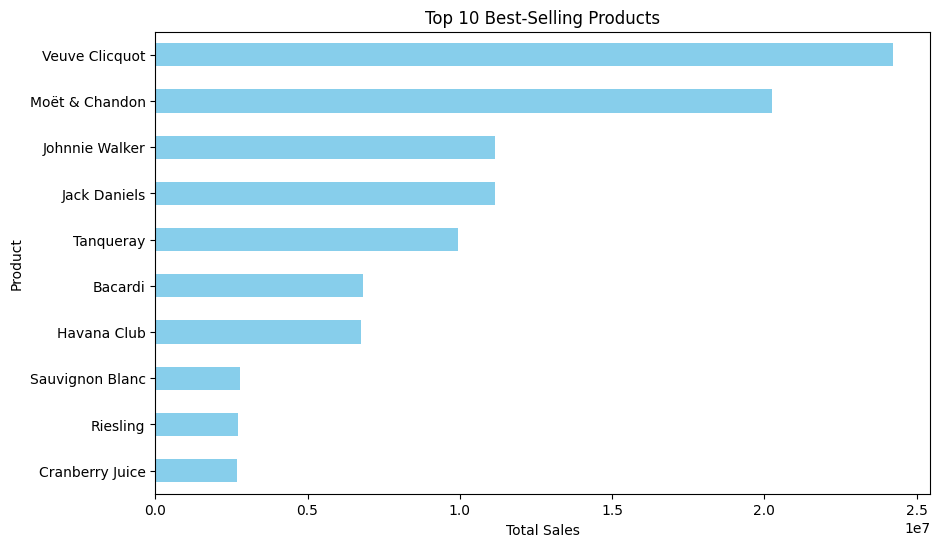

In [ ]:
top_products = df.groupby('Product')['Total_Price'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='barh', figsize=(10,6), color='skyblue')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.gca().invert_yaxis()
plt.show()


* Identify which beverages are your company's cash cows.

* Useful for inventory management and promotions.

##**Sales Distribution by Category**

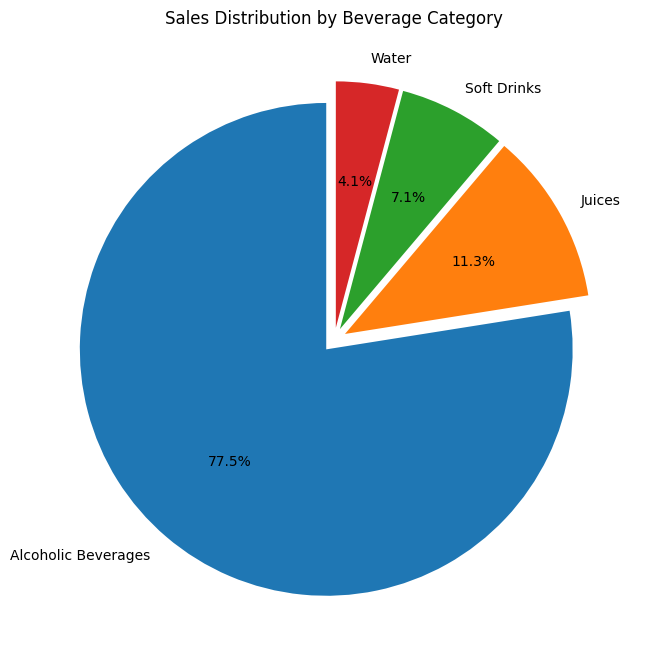

In [ ]:
category_sales = df.groupby('Category')['Total_Price'].sum()

category_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(8,8), startangle=90, explode=[0.05]*len(category_sales))
plt.title('Sales Distribution by Beverage Category')
plt.ylabel('')
plt.show()


* See which category dominates the market.

* Example: Water might have low unit price but very high volume.

##**Impact of Discount on Sales**

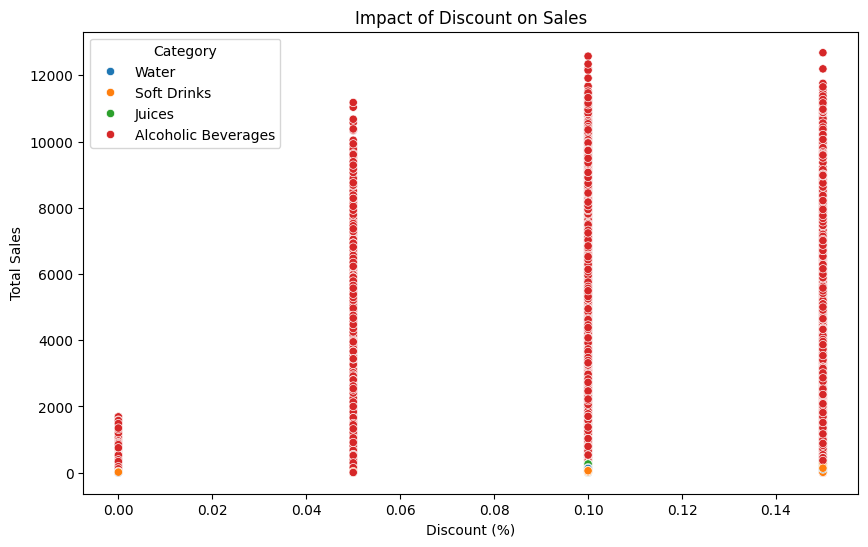

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Discount', y='Total_Price', hue='Category')
plt.title('Impact of Discount on Sales')
plt.xlabel('Discount (%)')
plt.ylabel('Total Sales')
plt.show()


* See if higher discounts lead to higher total sales.

* Useful for pricing and promotional strategy.

##**Quantity vs Discount Trend**

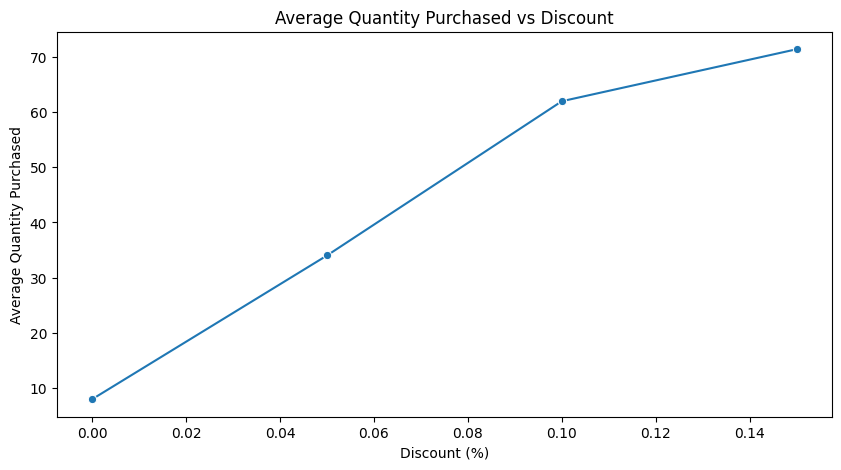

In [ ]:
discount_quantity = df.groupby('Discount')['Quantity'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=discount_quantity, x='Discount', y='Quantity', marker='o')
plt.title('Average Quantity Purchased vs Discount')
plt.xlabel('Discount (%)')
plt.ylabel('Average Quantity Purchased')
plt.show()


* Understand how much discount actually motivates customers to buy more units.

##**Sales by Region**

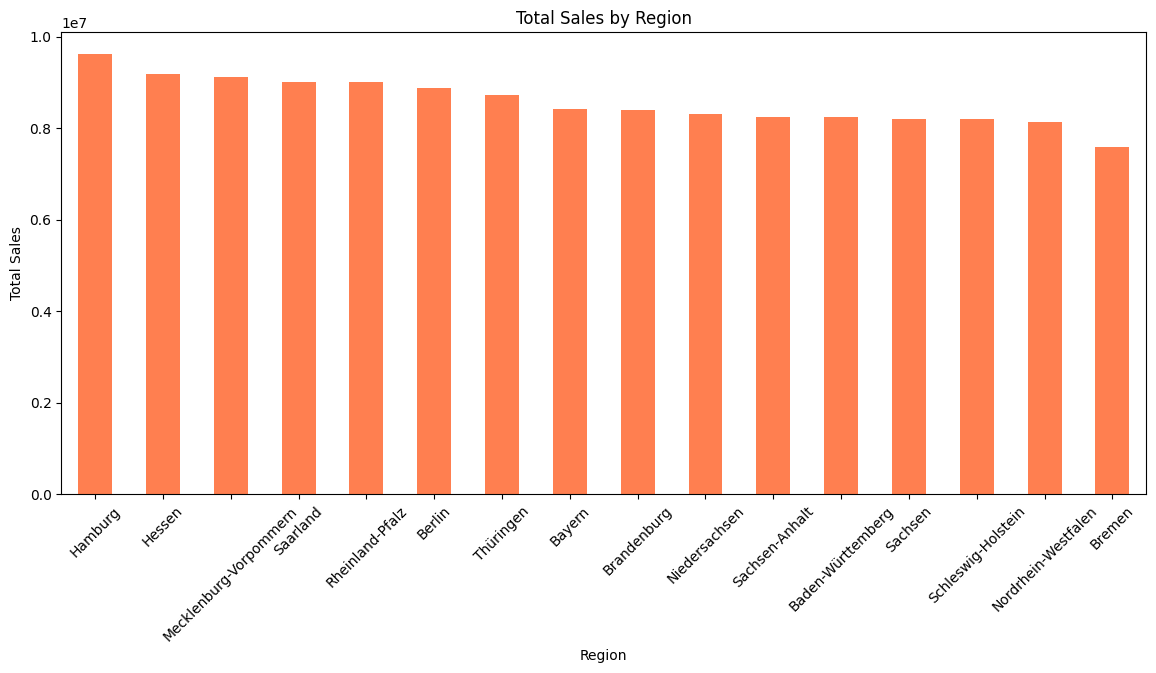

In [ ]:
region_sales = df.groupby('Region')['Total_Price'].sum().sort_values(ascending=False)

region_sales.plot(kind='bar', figsize=(14,6), color='coral')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


* Identify top performing regions.

* Target marketing efforts to low-performing regions.

##**Monthly Quantity Sold (Volume Trend)**

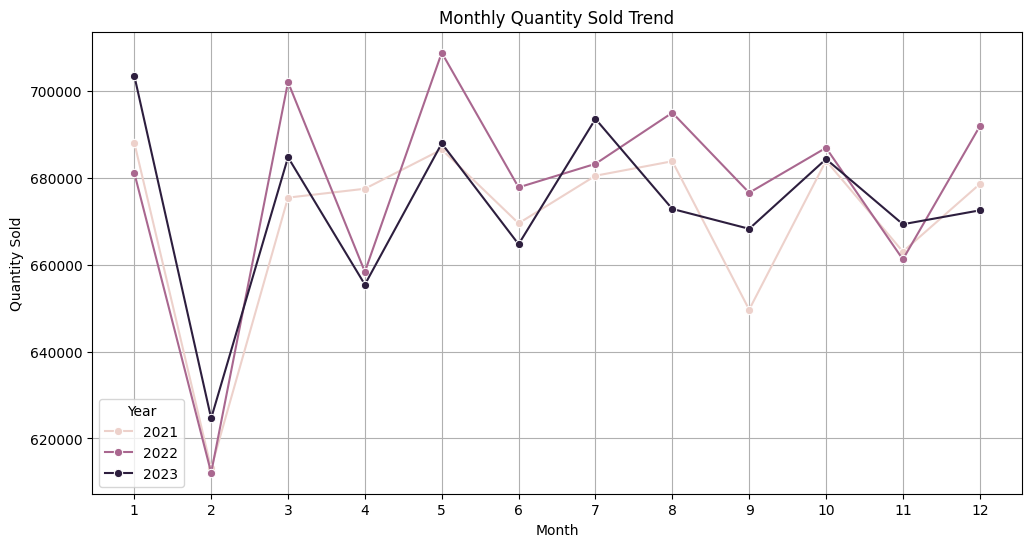

In [ ]:
monthly_quantity = df.groupby(['Year', 'Month'])['Quantity'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_quantity, x='Month', y='Quantity', hue='Year', marker='o')
plt.title('Monthly Quantity Sold Trend')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.xticks(range(1,13))
plt.grid()
plt.show()


* Spot seasonal demand patterns by volume (units sold, not just revenue).

##**Sales per Customer Type Across Time**

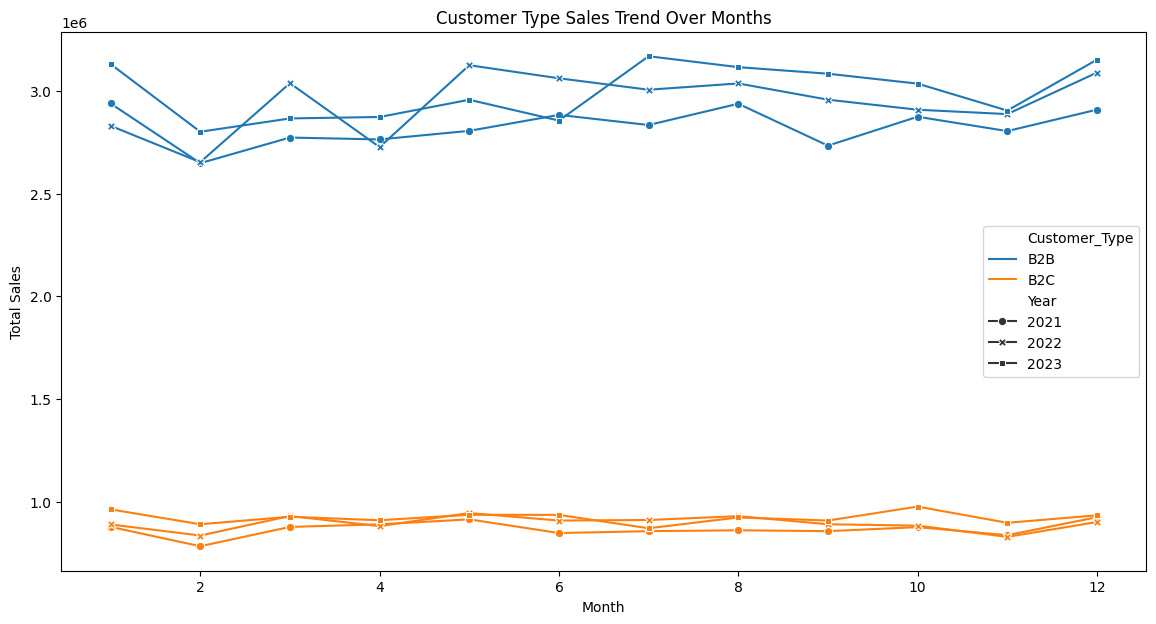

In [ ]:
customer_type_monthly = df.groupby(['Year', 'Month', 'Customer_Type'])['Total_Price'].sum().reset_index()

plt.figure(figsize=(14,7))
sns.lineplot(data=customer_type_monthly, x='Month', y='Total_Price', hue='Customer_Type', style='Year', markers=True, dashes=False)
plt.title('Customer Type Sales Trend Over Months')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


* See if B2B customers or B2C customers drive sales more during different months.

#***`Outlier Detection and handling`***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Customer_Type  1048575 non-null  object 
 1   Product        1048575 non-null  object 
 2   Category       1048575 non-null  object 
 3   Unit_Price     1048575 non-null  float64
 4   Quantity       1048575 non-null  int64  
 5   Discount       1048575 non-null  float64
 6   Total_Price    1048575 non-null  float64
 7   Region         1048575 non-null  object 
 8   Year           1048575 non-null  int32  
 9   Month          1048575 non-null  int32  
dtypes: float64(3), int32(2), int64(1), object(4)
memory usage: 72.0+ MB


In [ ]:
import pandas as pd

# Define function to calculate IQR outliers
def detect_iqr_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return (column < lower_bound) | (column > upper_bound)

# Select only numerical columns
numerical_cols = df.select_dtypes(include=["number"]).columns

# Apply the function to numerical columns
outliers_iqr = df[numerical_cols].apply(detect_iqr_outliers)

# View outliers
print("Outliers detected using IQR")
print(outliers_iqr.sum())  # Count of outliers per column


Outliers detected using IQR
Unit_Price     128151
Quantity       126730
Discount        44457
Total_Price    135999
Year                0
Month               0
dtype: int64


In [ ]:
#filter out the rows with any outliers
df=df[~(outliers_iqr.any(axis=1))]
print("Data after removing outliers (IQR):")
print(df)

Data after removing outliers (IQR):
        Customer_Type             Product     Category  Unit_Price  Quantity  \
0                 B2B          Vio Wasser        Water        1.66        53   
4                 B2B        Gerolsteiner        Water        0.87        35   
6                 B2B        Tomato Juice       Juices        2.14        44   
7                 B2B              Vittel        Water        0.43        13   
9                 B2B               Evian        Water        1.38         3   
...               ...                 ...          ...         ...       ...   
1048568           B2C  Rauch Multivitamin       Juices        2.38         8   
1048571           B2C          Fritz-Kola  Soft Drinks        2.05         2   
1048572           B2C        Volvic Touch        Water        1.46        11   
1048573           B2C              Vittel        Water        0.59         2   
1048574           B2C               Fanta  Soft Drinks        1.23        15   

   

In [ ]:
import pandas as pd
from scipy.stats import zscore

# Select only numerical columns dynamically
numerical_cols = df.select_dtypes(include=["number"]).columns

# Compute Z-scores
z_scores = df[numerical_cols].apply(zscore)

# Define threshold
threshold = 3

# Identify outliers
outliers_z = (z_scores.abs() > threshold)

# View outliers
print("Outliers detected using Z-Score:")
print(outliers_z.sum())  # Count of outliers per column


Outliers detected using Z-Score:
Unit_Price      5428
Quantity       21141
Discount           0
Total_Price    22967
Year               0
Month              0
dtype: int64


In [ ]:
df.shape

(792283, 10)

##***`Feature Transformation`***

In [ ]:
import pandas as pd

# Select only numerical columns dynamically
numerical_cols = df.select_dtypes(include=["number"]).columns

# Compute skewness
skewness = df[numerical_cols].skew()

# Display results
print("Skewness of numerical columns:")
print(skewness)


Skewness of numerical columns:
Unit_Price     0.912948
Quantity       1.943705
Discount       1.688766
Total_Price    2.447579
Year          -0.000970
Month         -0.004502
dtype: float64


In [ ]:
df['Quantity'] = np.log1p(df['Quantity'])
df['Discount'] = np.log1p(df['Discount'])
df['Total_Price'] = np.log1p(df['Total_Price'])

<ipython-input-223-f1f67c73ffd0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity'] = np.log1p(df['Quantity'])
<ipython-input-223-f1f67c73ffd0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Discount'] = np.log1p(df['Discount'])
<ipython-input-223-f1f67c73ffd0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [ ]:
import pandas as pd

# Select only numerical columns dynamically
numerical_cols = df.select_dtypes(include=["number"]).columns

# Compute skewness
skewness = df[numerical_cols].skew()

# Display results
print("Skewness of numerical columns:")
print(skewness)


Skewness of numerical columns:
Unit_Price     0.912948
Quantity       0.148984
Discount       1.658516
Total_Price    0.023083
Year          -0.000970
Month         -0.004502
dtype: float64


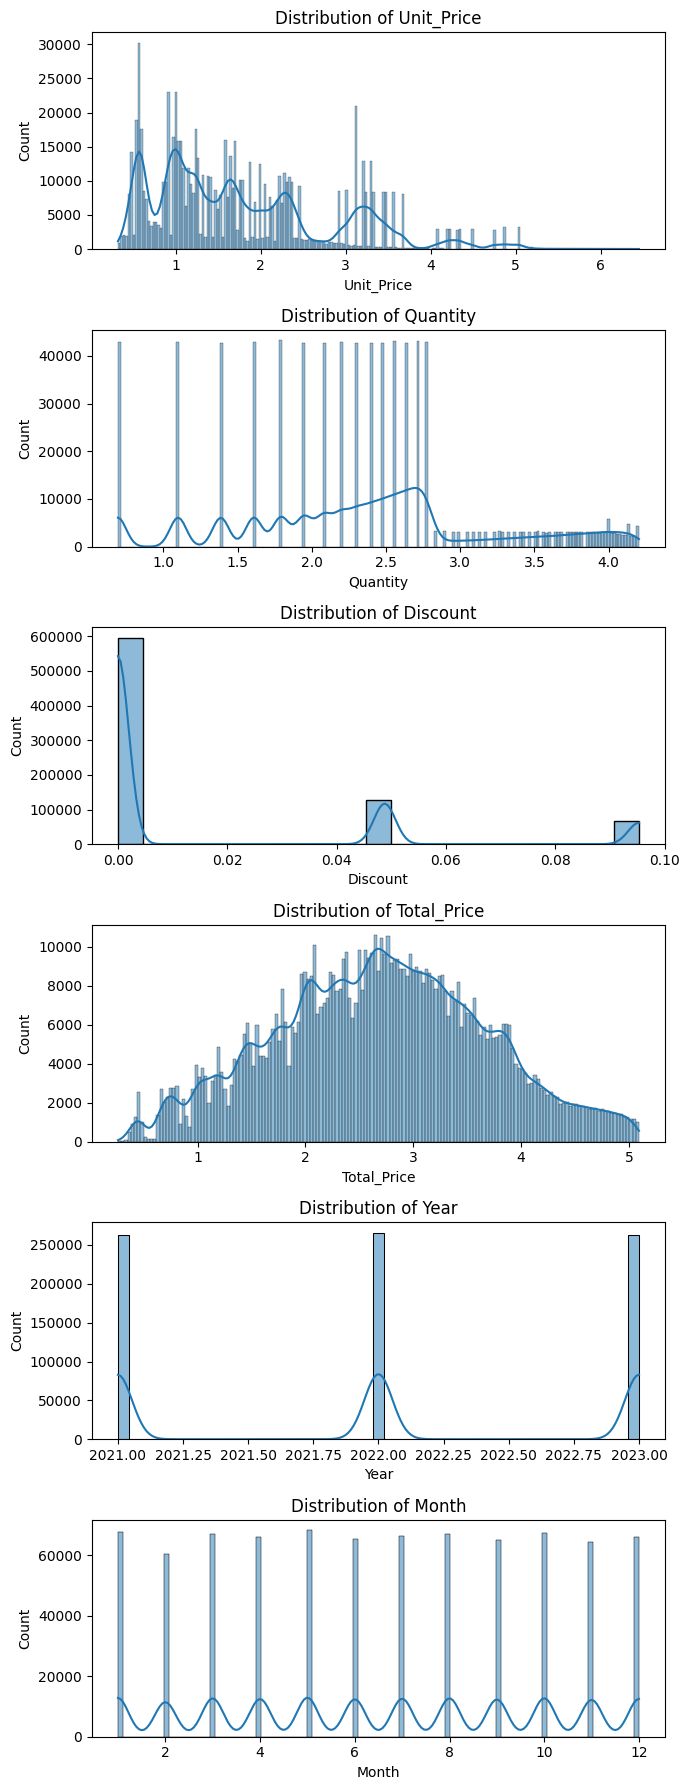

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns dynamically
numerical_cols = df.select_dtypes(include=["number"]).columns

# Set up a grid layout for multiple plots
fig, axes = plt.subplots(nrows=len(numerical_cols), figsize=(7, len(numerical_cols) * 3))

# Loop through numerical columns and plot histograms
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])  # Use predefined axes
    axes[i].set_title(f"Distribution of {col}")

# Adjust layout
plt.tight_layout()
plt.show()

##***`Encoding`***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 792283 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Customer_Type  792283 non-null  object 
 1   Product        792283 non-null  object 
 2   Category       792283 non-null  object 
 3   Unit_Price     792283 non-null  float64
 4   Quantity       792283 non-null  float64
 5   Discount       792283 non-null  float64
 6   Total_Price    792283 non-null  float64
 7   Region         792283 non-null  object 
 8   Year           792283 non-null  int32  
 9   Month          792283 non-null  int32  
dtypes: float64(4), int32(2), object(4)
memory usage: 60.4+ MB


In [ ]:
df.nunique()

,0
Customer_Type,2
Product,40
Category,4
Unit_Price,614
Quantity,66
Discount,3
Total_Price,12046
Region,16
Year,3
Month,12


In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df["Product"]=le.fit_transform(df["Product"])
df["Region"]=le.fit_transform(df["Region"])

print(df["Product"].dtype)
print(df["Region"].dtype)

int64
int64


<ipython-input-228-169ab7dda1ea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Product"]=le.fit_transform(df["Product"])
<ipython-input-228-169ab7dda1ea>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Region"]=le.fit_transform(df["Region"])


In [ ]:
df["Customer_Type"].unique()

array(['B2B', 'B2C'], dtype=object)

In [ ]:
one_hot_encoded=pd.get_dummies(df["Customer_Type"],prefix="one_hot",dtype=int)
df=pd.concat([df,one_hot_encoded],axis=1)

In [ ]:
df.drop(columns=["Customer_Type"],inplace=True)

In [ ]:
df["Category"].unique()

array(['Water', 'Juices', 'Soft Drinks', 'Alcoholic Beverages'],
      dtype=object)

In [ ]:
df["Category"]=df["Category"].map({'Water':0,'Juices':1,'Soft Drinks':2,'Alcoholic Beverages':3})
df

,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Year,Month,one_hot_B2B,one_hot_B2C
0,35,0,1.66,3.988984,0.09531,4.384274,0,2023,8,1,0
4,11,0,0.87,3.583519,0.09531,3.346389,0,2023,8,1,0
6,34,1,2.14,3.806662,0.09531,4.451319,5,2022,11,1,0
7,36,0,0.43,2.639057,0.04879,1.842136,5,2022,11,1,0
9,8,0,1.38,1.386294,0.04879,1.595339,5,2022,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1048568,24,1,2.38,2.197225,0.00000,2.997730,8,2022,8,0,1
1048571,10,2,2.05,1.098612,0.00000,1.629241,8,2022,8,0,1
1048572,38,0,1.46,2.484907,0.00000,2.836737,13,2023,11,0,1
1048573,36,0,0.59,1.098612,0.00000,0.779325,13,2023,11,0,1


In [ ]:
df.shape

(792283, 11)

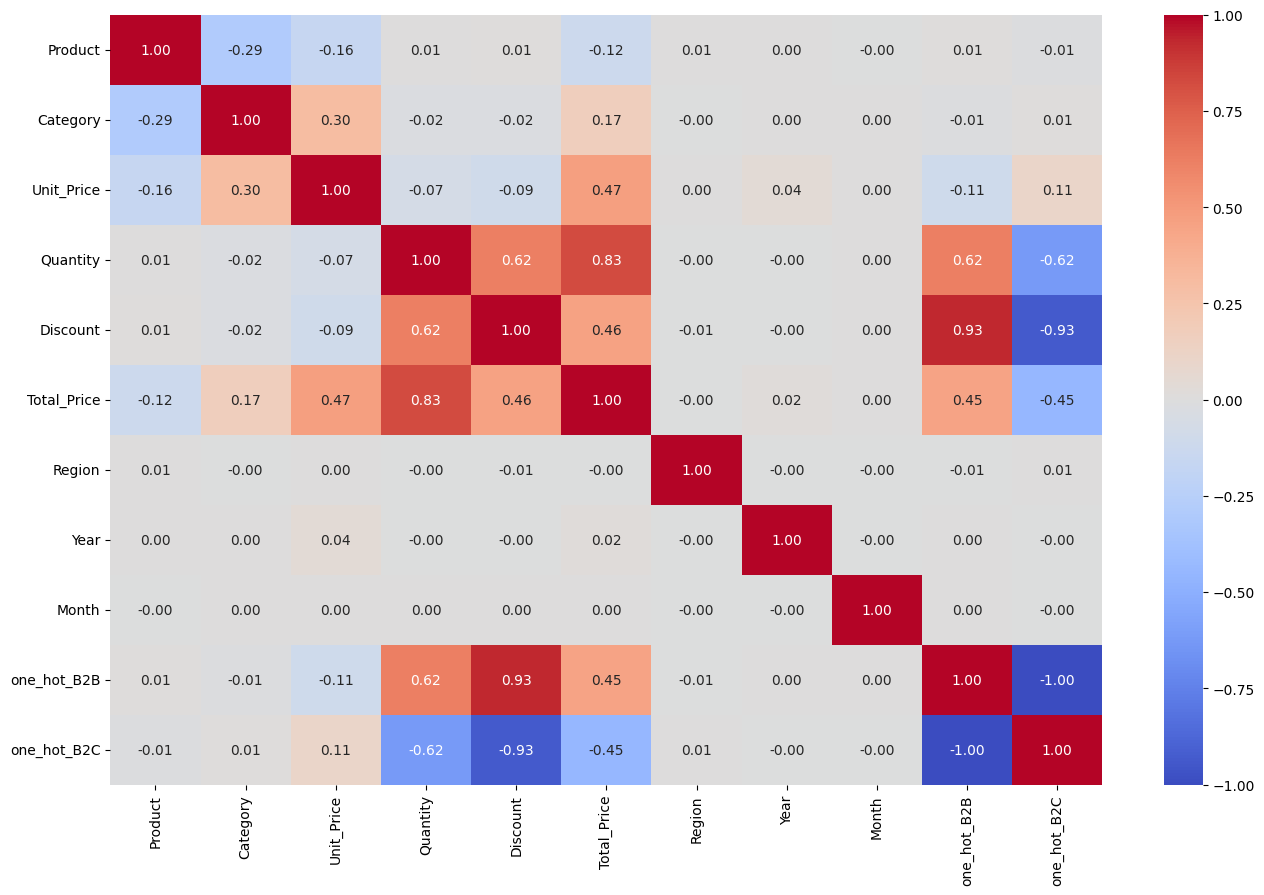

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.show()

In [ ]:
df.columns

Index(['Product', 'Category', 'Unit_Price', 'Quantity', 'Discount',
       'Total_Price', 'Region', 'Year', 'Month', 'one_hot_B2B', 'one_hot_B2C'],
      dtype='object')

In [ ]:
df.drop(columns=["Region","Year","Month"],inplace=True)

In [ ]:
df

,Product,Category,Unit_Price,Quantity,Discount,Total_Price,one_hot_B2B,one_hot_B2C
0,35,0,1.66,3.988984,0.09531,4.384274,1,0
4,11,0,0.87,3.583519,0.09531,3.346389,1,0
6,34,1,2.14,3.806662,0.09531,4.451319,1,0
7,36,0,0.43,2.639057,0.04879,1.842136,1,0
9,8,0,1.38,1.386294,0.04879,1.595339,1,0
...,...,...,...,...,...,...,...,...
1048568,24,1,2.38,2.197225,0.00000,2.997730,0,1
1048571,10,2,2.05,1.098612,0.00000,1.629241,0,1
1048572,38,0,1.46,2.484907,0.00000,2.836737,0,1
1048573,36,0,0.59,1.098612,0.00000,0.779325,0,1


In [ ]:
df.shape

(792283, 8)

#***`Data Scaling`***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 792283 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Product      792283 non-null  int64  
 1   Category     792283 non-null  int64  
 2   Unit_Price   792283 non-null  float64
 3   Quantity     792283 non-null  float64
 4   Discount     792283 non-null  float64
 5   Total_Price  792283 non-null  float64
 6   one_hot_B2B  792283 non-null  int64  
 7   one_hot_B2C  792283 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 54.4 MB


##***`MinMaxScaler()`***

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#MinMax Scaling
minmax_scaler=MinMaxScaler()

df_minmax_scaled=minmax_scaler.fit_transform(df)

In [ ]:
df_minmax_scaled

array([[0.8974359 , 0.        , 0.21859706, ..., 0.85334783, 1.        ,
        0.        ],
       [0.28205128, 0.        , 0.08972268, ..., 0.63847732, 1.        ,
        0.        ],
       [0.87179487, 0.33333333, 0.29690049, ..., 0.86722805, 1.        ,
        0.        ],
       ...,
       [0.97435897, 0.        , 0.18597064, ..., 0.53296532, 0.        ,
        1.        ],
       [0.92307692, 0.        , 0.04404568, ..., 0.10702496, 0.        ,
        1.        ],
       [0.23076923, 0.66666667, 0.14845024, ..., 0.56010878, 0.        ,
        1.        ]])

In [ ]:
df_minmax_scaled=pd.DataFrame(df_minmax_scaled,columns=df.columns)
df_minmax_scaled

,Product,Category,Unit_Price,Quantity,Discount,Total_Price,one_hot_B2B,one_hot_B2C
0,0.897436,0.000000,0.218597,0.938572,1.000000,0.853348,1.0,0.0
1,0.282051,0.000000,0.089723,0.823105,1.000000,0.638477,1.0,0.0
2,0.871795,0.333333,0.296900,0.886651,1.000000,0.867228,1.0,0.0
3,0.923077,0.000000,0.017945,0.554146,0.511909,0.327056,1.0,0.0
4,0.205128,0.000000,0.172920,0.197391,0.511909,0.275962,1.0,0.0
...,...,...,...,...,...,...,...,...
792278,0.615385,0.333333,0.336052,0.428323,0.000000,0.566295,0.0,1.0
792279,0.256410,0.666667,0.282219,0.115466,0.000000,0.282981,0.0,1.0
792280,0.974359,0.000000,0.185971,0.510248,0.000000,0.532965,0.0,1.0
792281,0.923077,0.000000,0.044046,0.115466,0.000000,0.107025,0.0,1.0


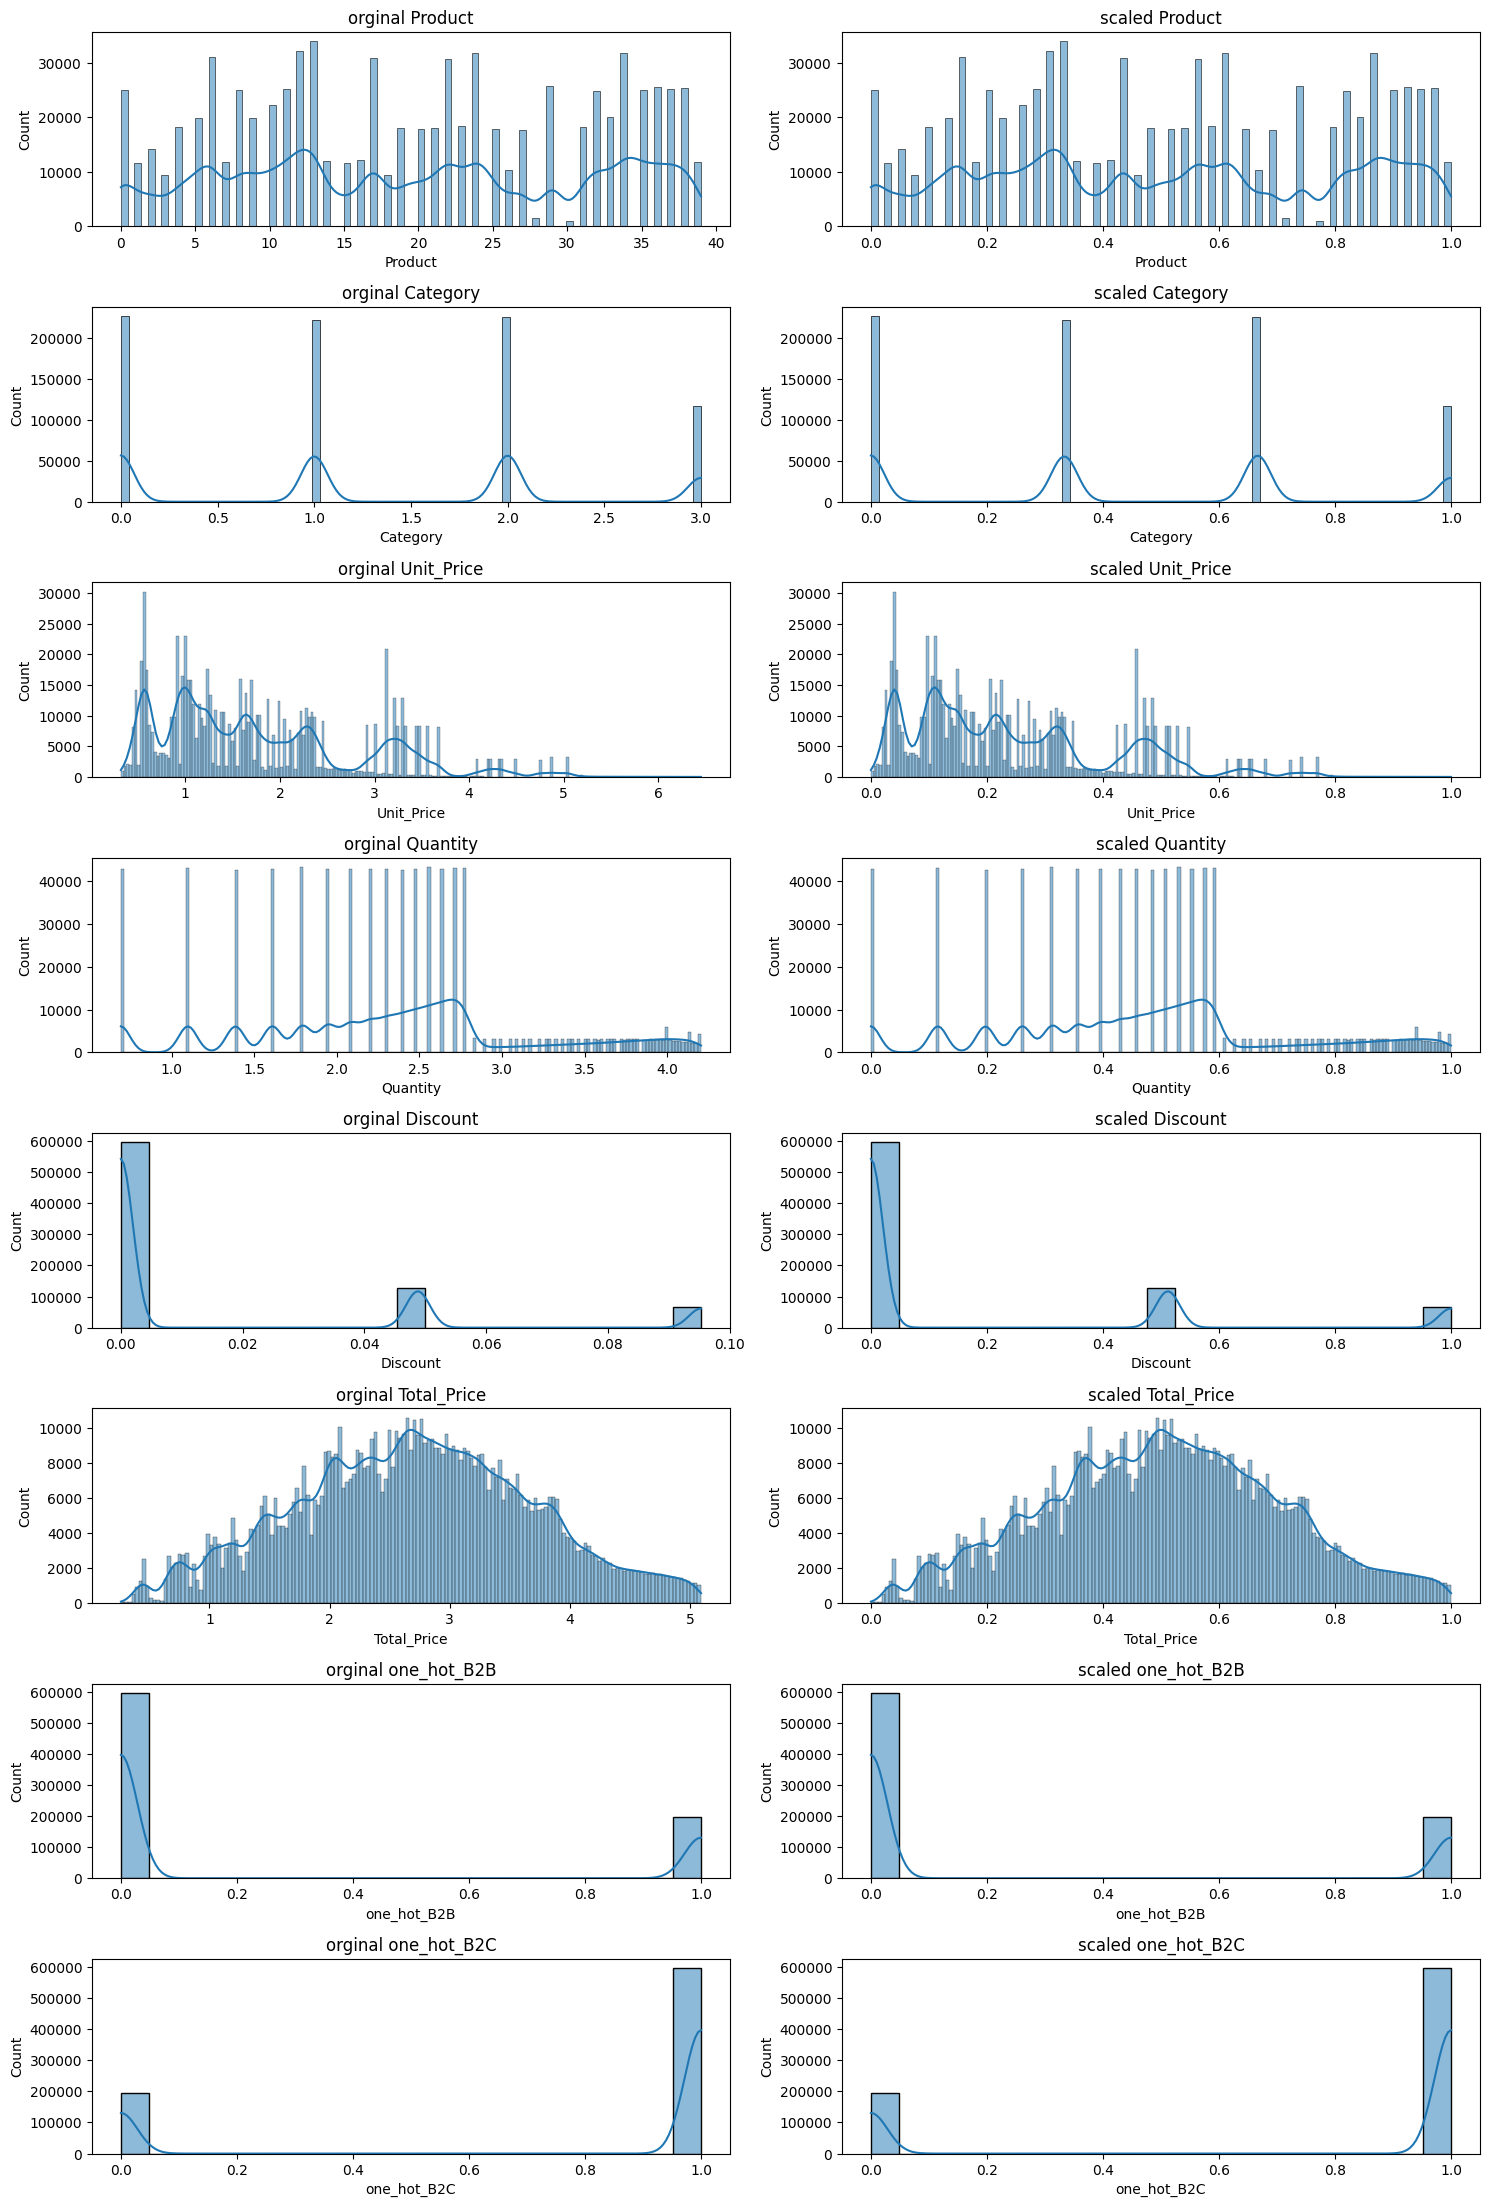

In [ ]:
#create subplots
plt.figure(figsize=(15,30))

#orginal and scaled data histograms for each feature
plt.subplot(11,2,1)
sns.histplot(df["Product"],kde=True)
plt.title("orginal Product")

plt.subplot(11,2,2)
sns.histplot(df_minmax_scaled["Product"],kde=True)
plt.title("scaled Product")

plt.subplot(11,2,3)
sns.histplot(df["Category"],kde=True)
plt.title("orginal Category")

plt.subplot(11,2,4)
sns.histplot(df_minmax_scaled["Category"],kde=True)
plt.title("scaled Category")

plt.subplot(11,2,5)
sns.histplot(df["Unit_Price"],kde=True)
plt.title("orginal Unit_Price")

plt.subplot(11,2,6)
sns.histplot(df_minmax_scaled["Unit_Price"],kde=True)
plt.title("scaled Unit_Price")

plt.subplot(11,2,7)
sns.histplot(df["Quantity"],kde=True)
plt.title("orginal Quantity")

plt.subplot(11,2,8)
sns.histplot(df_minmax_scaled["Quantity"],kde=True)
plt.title("scaled Quantity")

plt.subplot(11,2,9)
sns.histplot(df["Discount"],kde=True)
plt.title("orginal Discount")

plt.subplot(11,2,10)
sns.histplot(df_minmax_scaled["Discount"],kde=True)
plt.title("scaled Discount")

plt.subplot(11,2,11)
sns.histplot(df["Total_Price"],kde=True)
plt.title("orginal Total_Price")

plt.subplot(11,2,12)
sns.histplot(df_minmax_scaled["Total_Price"],kde=True)
plt.title("scaled Total_Price")

plt.subplot(11,2,13)
sns.histplot(df["one_hot_B2B"],kde=True)
plt.title("orginal one_hot_B2B")

plt.subplot(11,2,14)
sns.histplot(df_minmax_scaled["one_hot_B2B"],kde=True)
plt.title("scaled one_hot_B2B")

plt.subplot(11,2,15)
sns.histplot(df["one_hot_B2C"],kde=True)
plt.title("orginal one_hot_B2C")

plt.subplot(11,2,16)
sns.histplot(df_minmax_scaled["one_hot_B2C"],kde=True)
plt.title("scaled one_hot_B2C")

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

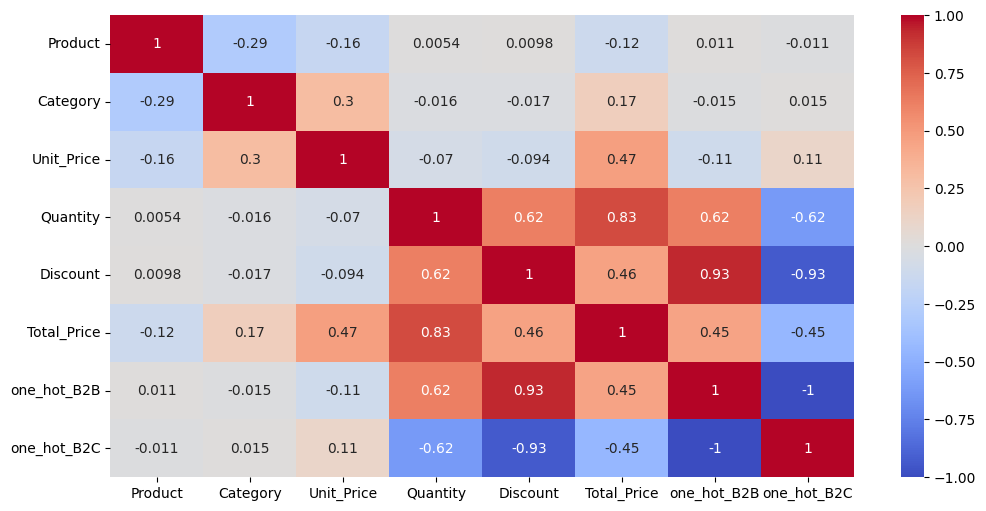

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df_minmax_scaled.corr(),annot=True,cmap="coolwarm")
plt.show

In [ ]:
df_minmax_scaled.corr()

,Product,Category,Unit_Price,Quantity,Discount,Total_Price,one_hot_B2B,one_hot_B2C
Product,1.000000,-0.292353,-0.162621,0.005413,0.009776,-0.120821,0.010618,-0.010618
Category,-0.292353,1.000000,0.298464,-0.015772,-0.016642,0.165586,-0.014803,0.014803
Unit_Price,-0.162621,0.298464,1.000000,-0.069951,-0.094412,0.473524,-0.105622,0.105622
Quantity,0.005413,-0.015772,-0.069951,1.000000,0.623906,0.827588,0.619211,-0.619211
Discount,0.009776,-0.016642,-0.094412,0.623906,1.000000,0.458642,0.930647,-0.930647
Total_Price,-0.120821,0.165586,0.473524,0.827588,0.458642,1.000000,0.448860,-0.448860
one_hot_B2B,0.010618,-0.014803,-0.105622,0.619211,0.930647,0.448860,1.000000,-1.000000
one_hot_B2C,-0.010618,0.014803,0.105622,-0.619211,-0.930647,-0.448860,-1.000000,1.000000


In [ ]:
df_minmax_scaled.columns

Index(['Product', 'Category', 'Unit_Price', 'Quantity', 'Discount',
       'Total_Price', 'one_hot_B2B', 'one_hot_B2C'],
      dtype='object')

#***`Dimensionality Reduction`***

In [ ]:
x=df_minmax_scaled.drop(columns=['Total_Price'])
y=df_minmax_scaled['Total_Price']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

from sklearn.metrics import r2_score, mean_squared_error

# #Training predictions
# y_train_pred = model.predict(x_train)
# r2_train = r2_score(y_train , y_train_pred)
# mse_train = mean_squared_error(y_train , y_train_pred)

#Validation predictions
y_val_pred=model.predict(x_test)  #use validation set
r2_val=r2_score(y_test,y_val_pred)
mse_val=mean_squared_error(y_test,y_val_pred)

#print("R2 score (Train):",r2_train)
print("R2 score (validation):",r2_val)
#print("MSE (Train):",mse_train)
print("MSE (validation):",mse_val)

R2 score (validation): 0.9721399462856624
MSE (validation): 0.0011589490233844663


##***`Feature Extraction (PCA)`***

In [ ]:
x=df_minmax_scaled.drop(columns=['Total_Price'])
y=df_minmax_scaled['Total_Price']

In [ ]:
x.head()

,Product,Category,Unit_Price,Quantity,Discount,one_hot_B2B,one_hot_B2C
0,0.897436,0.000000,0.218597,0.938572,1.000000,1.0,0.0
1,0.282051,0.000000,0.089723,0.823105,1.000000,1.0,0.0
2,0.871795,0.333333,0.296900,0.886651,1.000000,1.0,0.0
3,0.923077,0.000000,0.017945,0.554146,0.511909,1.0,0.0
4,0.205128,0.000000,0.172920,0.197391,0.511909,1.0,0.0


In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)

x_pca=pca.fit_transform(x)

In [ ]:
x_pca

array([[ 1.40339041, -0.54081968],
       [ 1.3759424 , -0.25193401],
       [ 1.38488884, -0.23267341],
       ...,
       [-0.35841716, -0.61771972],
       [-0.44637967, -0.61642018],
       [-0.35171388,  0.31575752]])

##***`Train Test Split`***

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(633826, 2)
(158457, 2)
(633826,)
(158457,)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# #Training predictions
# y_train_pred = model.predict(x_train)
# r2_train = r2_score(y_train , y_train_pred)
# mse_train = mean_squared_error(y_train , y_train_pred)

#Validation predictions
y_val_pred=model.predict(x_test)  #use validation set
r2_val=r2_score(y_test,y_val_pred)
mse_val=mean_squared_error(y_test,y_val_pred)

#print("R2 score (Train):",r2_train)
print("R2 score (validation):",r2_val)
#print("MSE (Train):",mse_train)
print("MSE (validation):",mse_val)

R2 score (validation): 0.2972549606066973
MSE (validation): 0.029233456813976214


#***`EVALUATION METRICS IN REGRESSION`***

##***`MAE`***

In [ ]:
#MAE (mean absolute error)
from sklearn.metrics import mean_absolute_error

mae=mean_absolute_error(y_test,y_val_pred)
print("MAE:",mae)

MAE: 0.13809614740432252


##***`MSE`***

In [ ]:
#MSE (mean squared error)
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test,y_val_pred)
print("MSE:",mse)

MSE: 0.029233456813976214


##***`RMSE`***

In [ ]:
#RMSE (root mean squared error)
rmse=np.sqrt(mse)
print("RMSE:",rmse)

RMSE: 0.17097794247790038


##***`R2 score`***

In [ ]:
#R2 score(R-squared)
from sklearn.metrics import r2_score

r2=r2_score(y_test,y_val_pred)
print("R2 score:",r2)

R2 score: 0.2972549606066973
